In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
# Importing dataset
data = pd.read_excel('https://github.com/rushikeshw791/Clustering-1/files/9793741/EastWestAirlines.xlsx',sheet_name='data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
# Column rename.
data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
data.isna().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data1=data.drop(labels='ID',axis=1)
data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


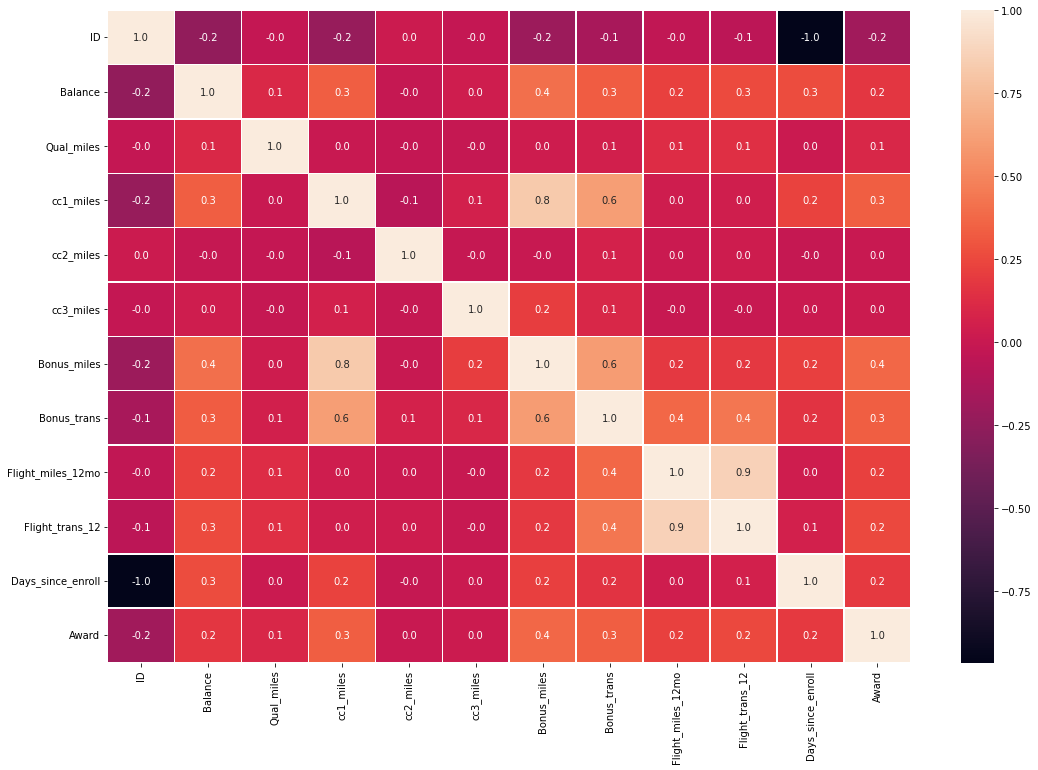

In [7]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

**Data preprocessing**

1.Standardizing the data

In [8]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [9]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(data1)
std_df.shape

(3999, 11)

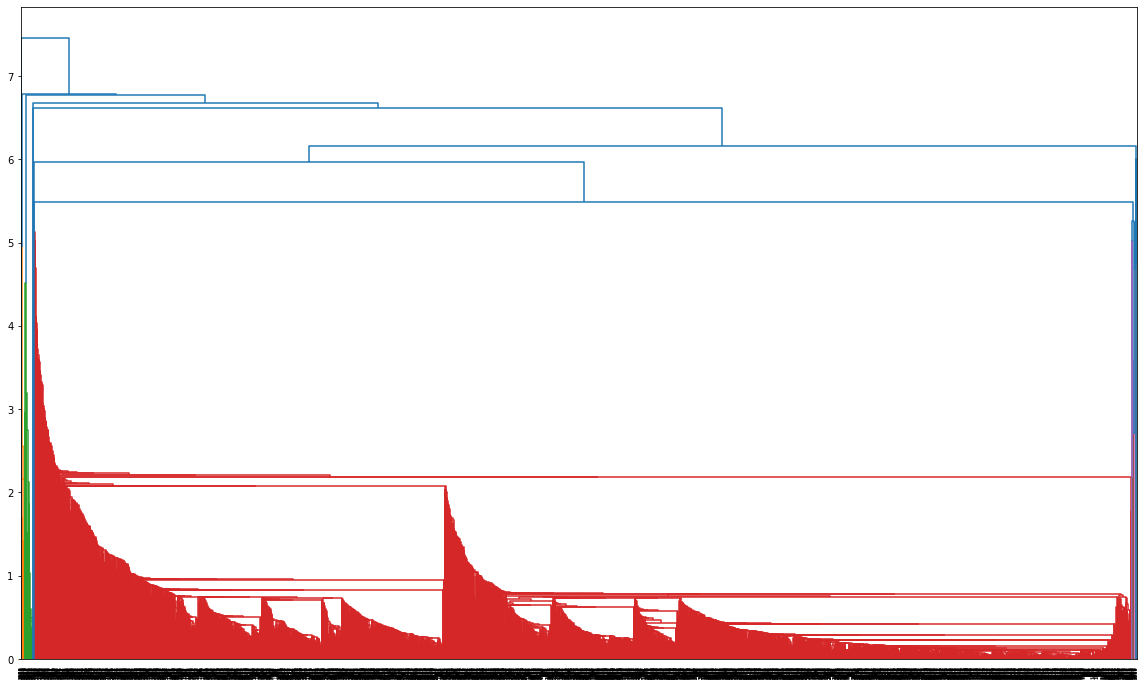

In [10]:
plt.figure(figsize=(20,12))
dendo = sch.dendrogram(sch.linkage(std_df,method='single'))

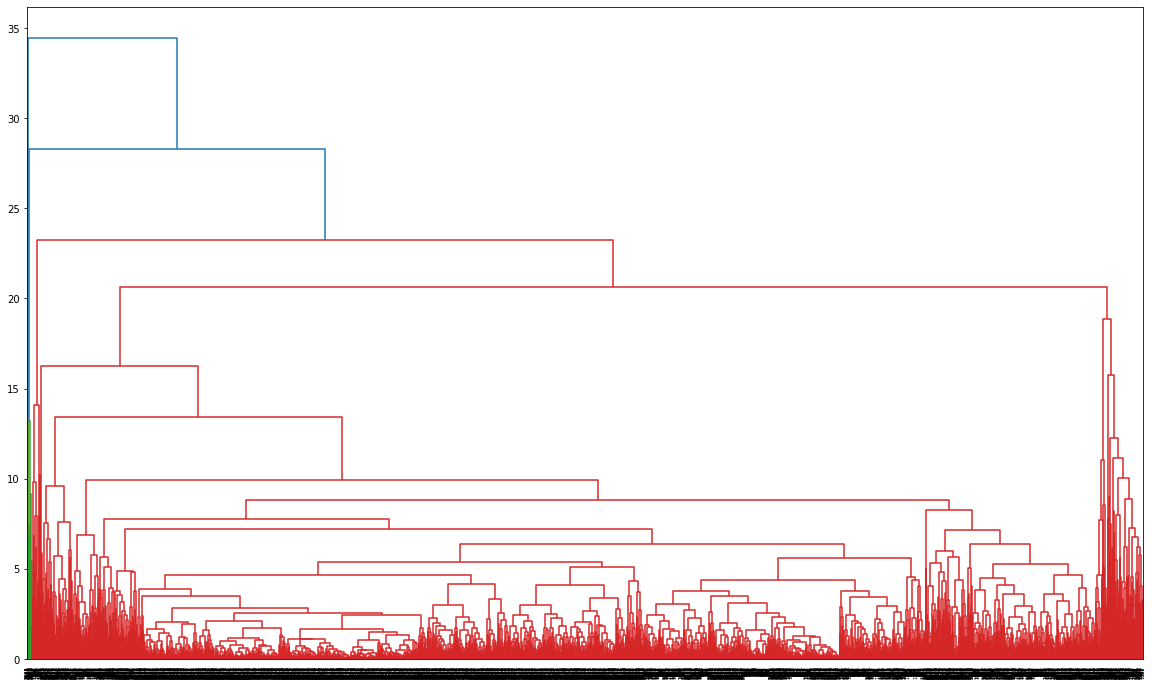

In [11]:
plt.figure(figsize=(20,12))
dendogram = sch.dendrogram(sch.linkage(std_df,method='complete'))

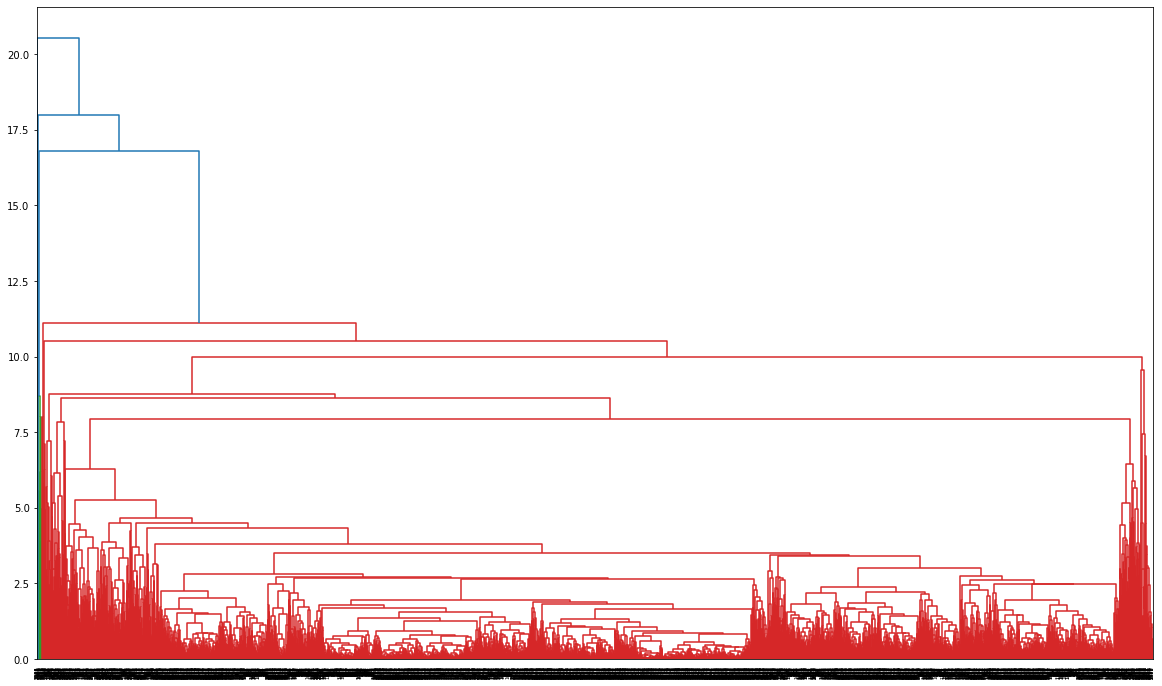

In [12]:
plt.figure(figsize=(20,12))
dendogram = sch.dendrogram(sch.linkage(std_df,method='average'))

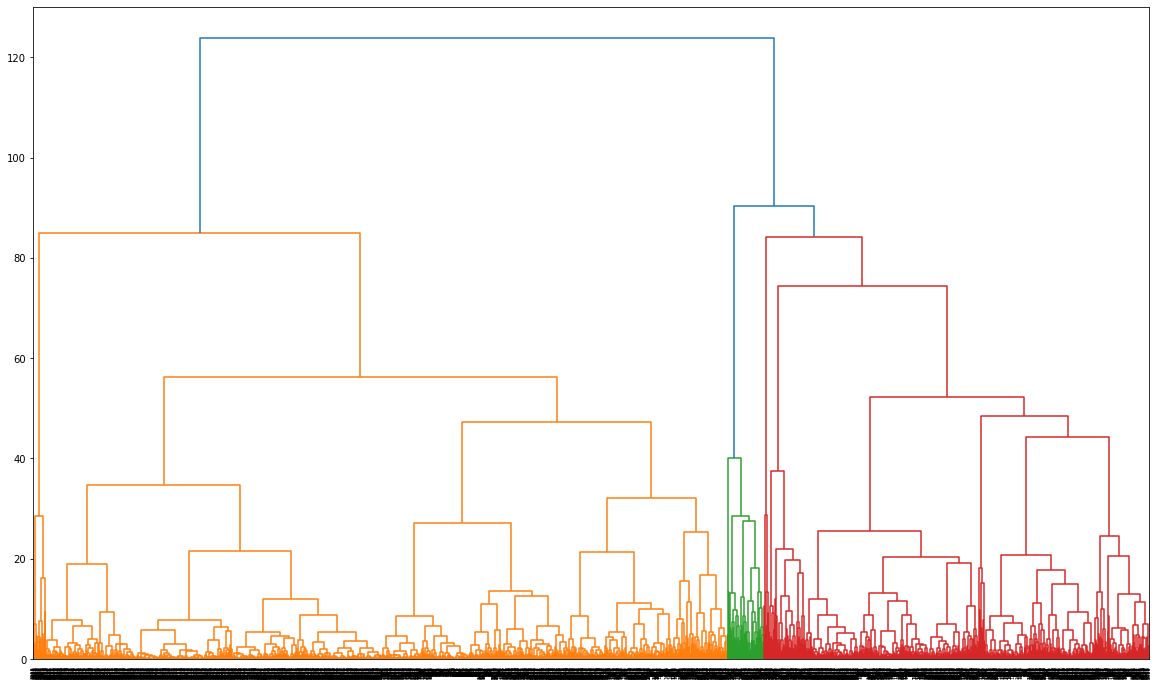

In [13]:
plt.figure(figsize=(20,12))
dendogram = sch.dendrogram(sch.linkage(std_df,method='ward'))

2.Normalizing the data

In [14]:
# Using Minmaxscaler for accuracy result comparison

minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(data1)
minmax_df.shape

(3999, 11)

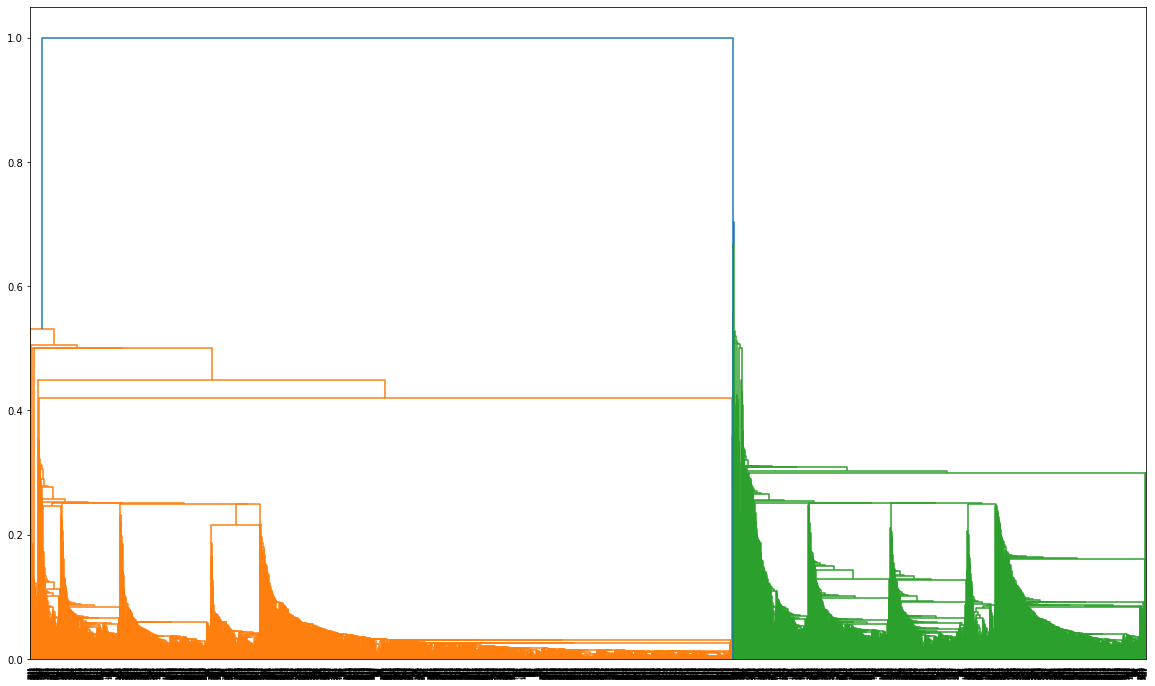

In [15]:
plt.figure(figsize=(20,12))
dendogram = sch.dendrogram(sch.linkage(minmax_df,method='single'))

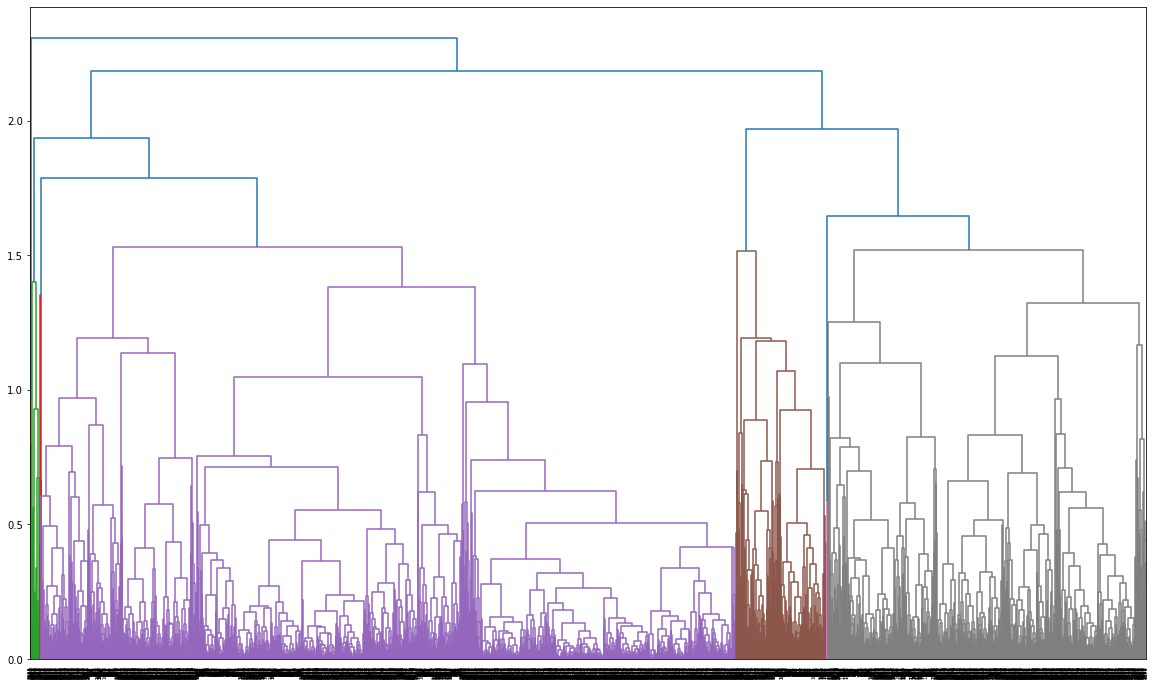

In [16]:
plt.figure(figsize=(20,12))
dendogram = sch.dendrogram(sch.linkage(minmax_df,method='complete'))

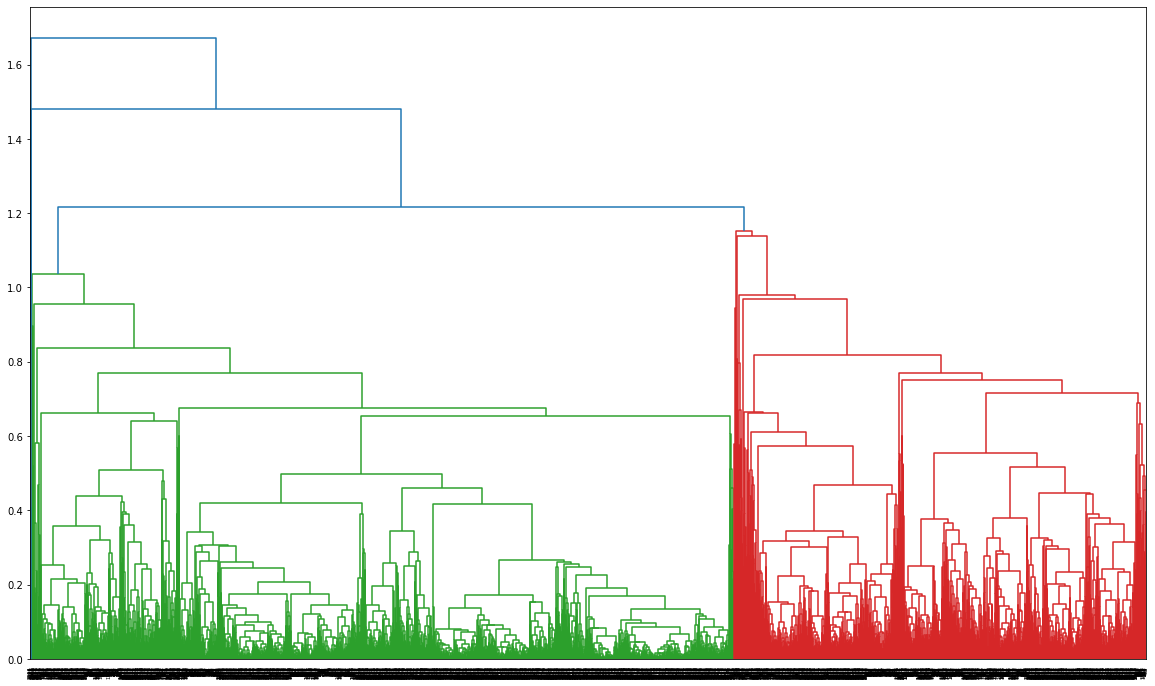

In [17]:
plt.figure(figsize=(20,12))
dendogram = sch.dendrogram(sch.linkage(minmax_df,method='average'))

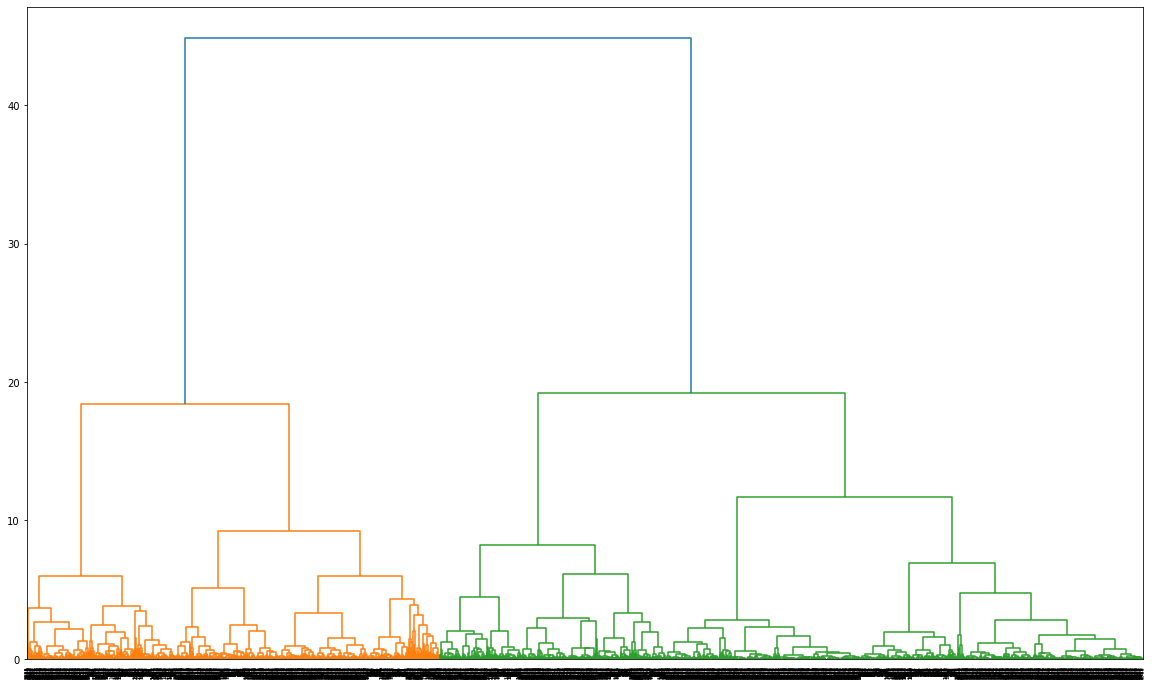

In [18]:
plt.figure(figsize=(20,12))
dendogram = sch.dendrogram(sch.linkage(minmax_df,method='ward'))

**Create clusters (y)**

In [19]:
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [20]:
y_hc=hclusters.fit_predict(minmax_df)

In [21]:
y_hc

array([1, 1, 1, ..., 0, 4, 4])

In [22]:
data['h_clusterid']=hclusters.labels_

In [23]:
data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,4


In [24]:
y=pd.DataFrame(hclusters.fit_predict(minmax_df),columns=['clusterid'])
y['clusterid'].value_counts()

1    1011
0     946
2     808
4     699
3     535
Name: clusterid, dtype: int64

In [25]:
# adding clusters to the dataset
data1['clusterid']=hclusters.labels_
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [26]:
data1.groupby('clusterid').agg(['mean']).reset_index()

,clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0
1,1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0
2,2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0
3,3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0
4,4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0


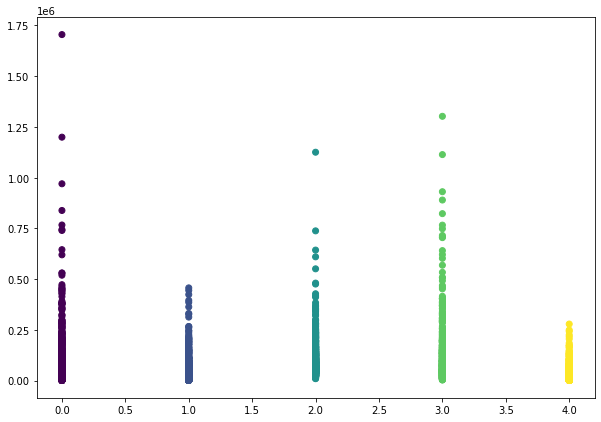

In [27]:
# plot clusters
plt.figure(figsize=(10,7))
plt.scatter(data1['clusterid'],data1['Balance'],c=hclusters.labels_)

**K means**

In [28]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [29]:
airline1= pd.read_excel('https://github.com/rushikeshw791/Clustering-1/files/9793741/EastWestAirlines.xlsx',sheet_name='data')
airline1.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [30]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [31]:
df_norm = norm_func(airline1.iloc[:,1:])

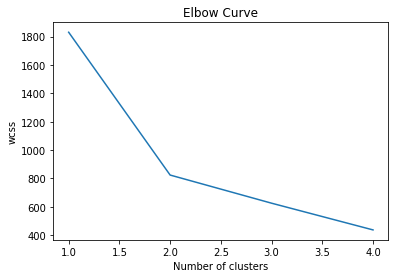

In [32]:
# Elbow curve
wcss=[]
for i in range(1,5):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(df_norm)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,5),wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [33]:
# select 4 clusters from above plot
model=KMeans(n_clusters=4)
model.fit(df_norm)
model.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [34]:
x=pd.Series(model.labels_)
airline1['Clust']=x

In [35]:
airline1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


**DBSCAN**

In [36]:
from sklearn.cluster import DBSCAN

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
airline2 = pd.read_excel('https://github.com/rushikeshw791/Clustering-1/files/9793741/EastWestAirlines.xlsx',sheet_name='data')
airline2.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [39]:
airline2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [40]:
df=airline2.iloc[:,1:5]

In [41]:
df.values

array([[28143,     0,     1,     1],
       [19244,     0,     1,     1],
       [41354,     0,     1,     1],
       ...,
       [73597,     0,     3,     1],
       [54899,     0,     1,     1],
       [ 3016,     0,     1,     1]])

In [42]:
stscaler=StandardScaler().fit(df.values)
x=stscaler.transform(df.values)

In [43]:
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01,
        -9.82418871e-02],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01,
        -9.82418871e-02],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01,
        -9.82418871e-02],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01,
        -9.82418871e-02],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01,
        -9.82418871e-02],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01,
        -9.82418871e-02]])

In [44]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(x)

DBSCAN(eps=2)

In [45]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
c1=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [47]:
c1

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [48]:
pd.concat([airline2,c1],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0
